In [18]:
import nodes
import require
import verbose
verbose.set_level( 0 )

data_for_country = require.single( "data_for_country" )
crop_to_valid_range = require.single( "crop_to_valid_range" )
df = crop_to_valid_range( data_for_country.get_result( "Germany" ))
#model = nodes.find( "train_honest_forward" ).get_result( subset = slice( 0, 5 ))
model = nodes.find( "train_ensemble" ).get_result( )

training ensemble: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.38it/s]
new_deaths_smoothed_per_million


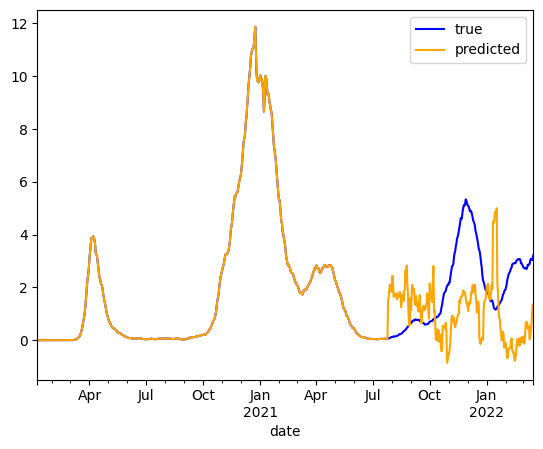

In [19]:
import matplotlib.pyplot as plt

time_range = slice( 0, 800 )
column_name = "new_deaths_smoothed_per_million"
column = df.columns.tolist( ).index( column_name )

start = 565
df_pred = model.predict_replace( df, start = start )
df_pred.iloc[ :start ] = df.iloc[ :start ]
assert not df.isna( ).any( ).any( )
assert not df_pred.isna( ).any( ).any( )

df.iloc[ time_range, column ].plot( color = "blue" )
df_pred.iloc[ time_range, column ].plot( color = "orange" )


line = lambda color, label: plt.Line2D([ ], [ ], color = color, label = label )
h = [ line( "blue", "true" ), line( "orange", "predicted" )]

plt.legend( handles = h )
print( df_pred.columns[ column ])

In [17]:
df_pred.isna( )

,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,new_vaccinations_smoothed_per_million,new_tests_smoothed_per_thousand,c6m_stay_at_home_requirements==1.0,c6m_stay_at_home_requirements==2.0,c6m_stay_at_home_requirements==3.0,c8ev_internationaltravel==1.0,c8ev_internationaltravel==2.0,c8ev_internationaltravel==3.0,c8ev_internationaltravel==4.0,h6m_facial_coverings==1.0,h6m_facial_coverings==2.0,h6m_facial_coverings==3.0,h6m_facial_coverings==4.0,c4m_restrictions_on_gatherings==1.0,c4m_restrictions_on_gatherings==2.0,c4m_restrictions_on_gatherings==3.0,c4m_restrictions_on_gatherings==4.0
date,,,,,,,,,,,,,,,,,,,
2020-01-08,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2020-01-09,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2020-01-10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2020-01-11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2020-01-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2023-05-13,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2023-05-14,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
